# Exercise I

**For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.**

### - *revisit wording to improve and get comfortable.

- **Has the network latency gone up since we switched internet service providers?**

**NULL HYPOTHESIS (H0):** There is no difference in network latency since we switched ISPs.

**ALTERNATE HYPOTHESIS (Ha):** There is a difference in network latency since we switched ISPs.

**TRUE (+):** if we reject the null hypothesis after switching ISPs, the network latency has gone up and the test detects this change.

**TRUE (-):** if we fail to reject the null hypothesis After switching ISPs, the network latency did not change. the test shows no increase or changes.

**TYPE I ERROR:** The test poorly identifies any increase in network latency when there is no change

**TYPE II ERROR:** The tests failed to identify an increase in nework latency, even after it shows it has gone up.

- **Is the website redesign any good?**

**NULL HYPOTHESIS (H0):** The web redesign is not as good and has not had any impact on metrics.

**ALTERNATE HYPOTHESIS (Ha):** The web redesign is good and has driven user count and engagement.

**TRUE (+):** The redesign of the website shows promising results for metrics, and the test reflects those outcomes.

**TRUE (-):** The redesign of the website is not driving any change in website metrics, and the test shows there was no impact from the redesign.

**TYPE I ERROR:** The test shows false when indicating an improvement in website metrics, but there is no change

**TYPE II ERROR:** The test failed ot detect an improvement in website metrics, even as the redesign has made an improvement.

- **Is our television ad driving more sales?**

**NULL HYPOTHESIS (H0):** The television advertisement has failed to drive sales and has not driven sales.

**ALTERNATE HYPOTHESIS (Ha):** The television advertisement has made changes, and has driven sales.

**TRUE (+):** The TV advertisement has made impact on sales and the test is correctly displays those results.

**TRUE (-):** The TV advertisement has not made an impact on sales and the test reflects those negative results.

**TYPE I ERROR:** The test shows TV ad sales conditions are respresented as false, but we can see that there is no change.

**TYPE II ERROR:** The test faield to display increase in sales from the TV ad, even though there is an up-tick in sales.

# **------------------------------------------------------------------------------------------------------**

#### continued...

# Exercise II

Continue working in your hypothesis_testing notebook.

In [1]:
import numpy as np
import pandas as pd

from pydataset import data
from scipy import stats
from scipy.stats import chi2_contingency

1. **Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.**

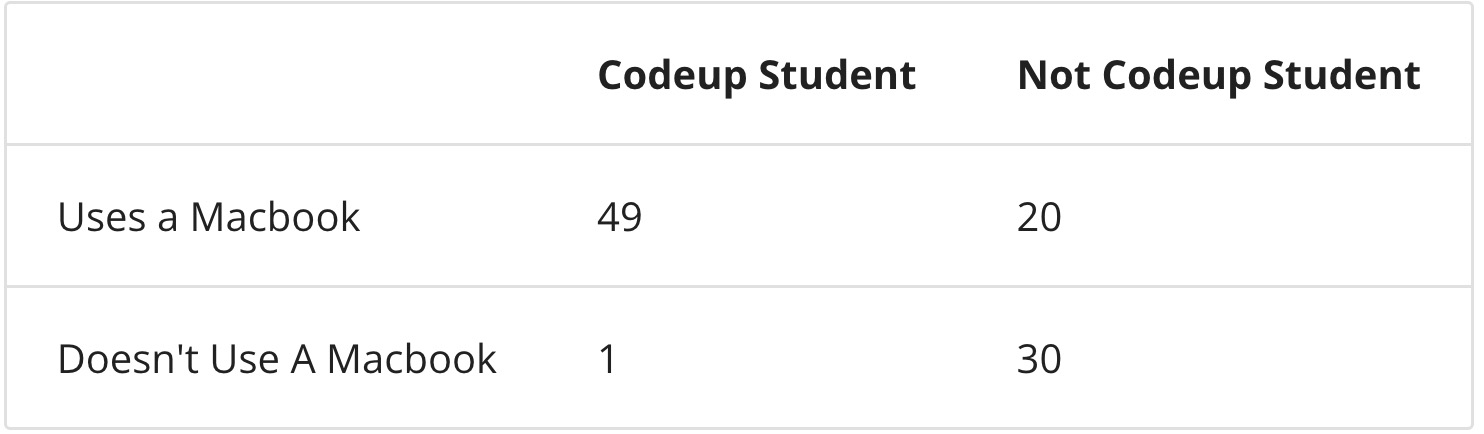

**NULL HYPOTHESIS (H0):** A Macbook user is independent from being a codeup student

**ALTERNATIVE HYPOTHESIS (Ha):** A Macbook user is dependent on being a codeup student

In [2]:
# made the table to use the data
data = {
    'Codeup Student': [49, 1],
    'Not Codeup Student': [20, 30]
}
contingency_table = pd.DataFrame(data, index=['Uses a Macbook', "Doesn't Use A Macbook"])

In [3]:
#implemened the chi squared contingency test
chi, p, degf, exp = stats.chi2_contingency(contingency_table)

In [4]:
chi

36.65264142122487

In [5]:
p

1.4116760526193828e-09

In [6]:
degf

1

In [7]:
exp

array([[34.5, 34.5],
       [15.5, 15.5]])

In [8]:
contingency_table

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [9]:
a = 0.05

In [10]:
if p < a:
    print('We reject the null hypothesis. There appears to be a relationship.')
else: print('We failed to reject the null hypothesis.')

We reject the null hypothesis. There appears to be a relationship.


2. **Choose another 2 categorical variables from the mpg dataset.**

#### **Categorical variables:**

- cyl | trans

In [11]:
import numpy as np
import pandas as pd

from pydataset import data
from scipy import stats
from scipy.stats import chi2_contingency

#imported data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [12]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [13]:
mpg.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [14]:
mpg.drv.value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

- State your null and alternative hypotheses.

**NULL HYPOTHESIS (H0):** cylinders are independent from transmission type

**ALTERNATIVE HYPOTHESIS (Ha):** cylinders are dependent on transmission type

- State your alpha.

In [15]:
#stated alpha
a = 0.05

- Perform a chi2 test of indepedence.

In [16]:
observed = pd.crosstab(mpg.drv, mpg.cyl)
observed

cyl,4,5,6,8
drv,,,,
4,23,0,32,48
f,58,4,43,1
r,0,0,4,21


In [17]:
#implemened the chi squared contingency test
chi, p, degf, exp = stats.chi2_contingency(observed)

**------------------------------------------------------------------------------------------------------**

#### **Instructor's way to organize,**

In [18]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(exp.astype(int))
print('\n----')
print(f'chi^2 = {chi:.4f}')
print(f'p     = {p}')

Observed
[[23  0 32 48]
 [58  4 43  1]
 [ 0  0  4 21]]

Expected
[[35  1 34 30]
 [36  1 35 31]
 [ 8  0  8  7]]

----
chi^2 = 98.1355
p     = 6.143348809350951e-19


**------------------------------------------------------------------------------------------------------**

In [19]:
chi

98.13550541481473

In [20]:
p

6.143348809350951e-19

In [21]:
degf

6

In [22]:
exp

array([[35.65384615,  1.76068376, 34.77350427, 30.81196581],
       [36.69230769,  1.81196581, 35.78632479, 31.70940171],
       [ 8.65384615,  0.42735043,  8.44017094,  7.47863248]])

- State your conclusion

In [23]:
if p < a:
    print('We reject the null hypothesis. There appears to be a relationship.')
else: print('We failed to reject the null hypothesis.')

We reject the null hypothesis. There appears to be a relationship.


  
3. **Use the data from the employees database to answer these questions:**

In [24]:
# DS Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pydataset import data
from env import get_connection
from sqlalchemy import create_engine, text

In [25]:
def get_db_url(database):
    return get_connection(database)

In [26]:
url = get_db_url('employees')
query = text('SELECT * FROM employees')
engine = create_engine(url)
employees = pd.read_sql(query, engine.connect())

In [27]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


In [28]:
url = get_db_url('employees')
query = text('''
        SELECT *
        FROM employees AS e 
        JOIN dept_emp AS de ON e.emp_no = de.emp_no 
        JOIN departments AS d ON de.dept_no = d.dept_no
        WHERE to_date = '9999-01-01'
        ''')
engine = create_engine(url)
employees = pd.read_sql(query, engine.connect())

In [29]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date,dept_no,dept_name
0,10038,1960-07-20,Huan,Lortz,M,1989-09-20,10038,d009,1989-09-20,9999-01-01,d009,Customer Service
1,10049,1961-04-24,Basil,Tramer,F,1992-05-04,10049,d009,1992-05-04,9999-01-01,d009,Customer Service
2,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,10060,d009,1992-11-11,9999-01-01,d009,Customer Service
3,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,10088,d009,1992-03-21,9999-01-01,d009,Customer Service
4,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,10112,d009,1998-05-01,9999-01-01,d009,Customer Service


In [30]:
employees = employees.drop(['emp_no', 'dept_no', 'birth_date', 'hire_date', 'from_date', 'to_date', 'first_name', 'last_name'], axis=1)

In [31]:
employees['emp_dept'] = np.where(employees.dept_name.str.startswith('S'), 'Sales', 'Marketing')
employees.head()

,gender,dept_name,emp_dept
0,M,Customer Service,Marketing
1,F,Customer Service,Marketing
2,M,Customer Service,Marketing
3,F,Customer Service,Marketing
4,F,Customer Service,Marketing


In [32]:
employees = employees.drop(['dept_name'], axis=1)

In [33]:
employees.head()

,gender,emp_dept
0,M,Marketing
1,F,Marketing
2,M,Marketing
3,F,Marketing
4,F,Marketing


In [34]:
employees.gender.value_counts()

M    144114
F     96010
Name: gender, dtype: int64

In [35]:
gender_dept_correlation = pd.crosstab(employees.gender, employees.emp_dept)
gender_dept_correlation 

emp_dept,Marketing,Sales
gender,,
F,81011,14999
M,121412,22702


In [36]:
#implemened the chi squared contingency test
chi, p, degf, exp = stats.chi2_contingency(gender_dept_correlation)

In [37]:
chi

0.7313235933645983

In [38]:
p

0.39245449654187614

In [39]:
degf

1

In [40]:
exp

array([[ 80935.81745265,  15074.18254735],
       [121487.18254735,  22626.81745265]])

In [41]:
#set alpha
a = 0.05

In [42]:
if p < a:
    print('We reject the null hypothesis. There appears to be a relationship.')
else: print('We failed to reject the null hypothesis.')

We failed to reject the null hypothesis.


- Is an employee's gender independent of whether or not they are or have been a manager?

# **------------------------------------------------------------------------------------------------------**

# Exercises III

In [43]:
# DS Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pydataset import data
from env import get_connection
from sqlalchemy import create_engine, text

## **1. Answer with the type of stats test you would use (assume normal distribution):**

- Is there a relationship between the length of your arm and the length of your foot?


  - **chi squared contingency test**

- Does smoking affect when or not someone has lung cancer?

  - **Pearson’s r correlation test**

- is gender independent of a person's blood type?

  - **chi squared contingency test**
  
- Does whether or not a person has a cat or dog affect whether they live in an apartment?

  - **chi squared contingency test**

- Does the length of time of the lecture correlate with a student's grade?

  - **Pearson’s r correlation test**



## **2. Use the telco_churn data.**

In [44]:
# definining eval result function
def eval_result(p_value, a = 0.05):
    
    if p_value < a:

        print('Awesome Sauce! Your result is significant!')
        
    else: 

        print('Your reslut was not significant!')

In [45]:
def get_db_url(database):
    return get_connection(database)

In [46]:
url = get_db_url('telco_churn')
query = text('SELECT * FROM customers, internet_service_types')
engine = create_engine(url)
tc = pd.read_sql(query, engine.connect())

In [47]:
tc.nunique()

customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
internet_service_type_id       3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
contract_type_id               3
paperless_billing              2
payment_type_id                4
monthly_charges             1585
total_charges               6531
churn                          2
internet_service_type_id       3
internet_service_type          3
dtype: int64

In [48]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21129 entries, 0 to 21128
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               21129 non-null  object 
 1   gender                    21129 non-null  object 
 2   senior_citizen            21129 non-null  int64  
 3   partner                   21129 non-null  object 
 4   dependents                21129 non-null  object 
 5   tenure                    21129 non-null  int64  
 6   phone_service             21129 non-null  object 
 7   multiple_lines            21129 non-null  object 
 8   internet_service_type_id  21129 non-null  int64  
 9   online_security           21129 non-null  object 
 10  online_backup             21129 non-null  object 
 11  device_protection         21129 non-null  object 
 12  tech_support              21129 non-null  object 
 13  streaming_tv              21129 non-null  object 
 14  stream

In [49]:
tc.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type_id,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,No,2,Yes,2,65.6,593.3,No,3,None
1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,No,2,Yes,2,65.6,593.3,No,2,Fiber optic
2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,No,2,Yes,2,65.6,593.3,No,1,DSL
3,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,Yes,1,No,2,59.9,542.4,No,3,None
4,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,Yes,1,No,2,59.9,542.4,No,2,Fiber optic


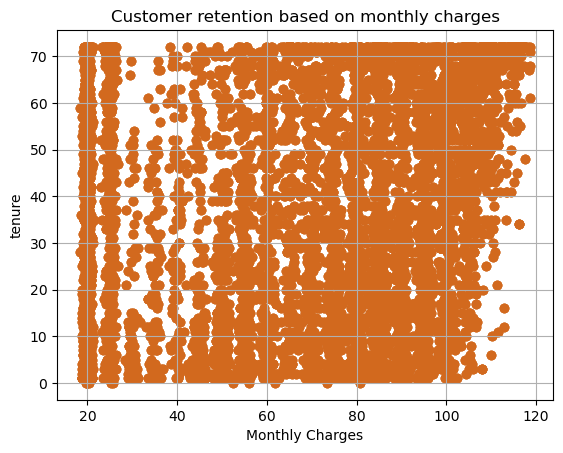

In [50]:
#always create a visual to accomodate the stats tests

plt.scatter(tc.monthly_charges, tc.tenure, color='chocolate')
plt.xlabel('Monthly Charges')
plt.ylabel('tenure')
plt.title('Customer retention based on monthly charges')

plt.grid()
plt.show()

In [51]:
r, p = stats.pearsonr(tc.monthly_charges, tc.tenure)
r, p

# we can see the correlation will not be very linear based on value returned

(0.24789985628615094, 2.3856762570707988e-293)

In [52]:
eval_result(p)

Awesome Sauce! Your result is significant!


- Does tenure correlate with monthly charges?

    - No it does not

### **This route did not work **
- reference: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
    - If ‘coerce’, then invalid parsing will be set as NaN.

- attempted ot change column to a int and float
  
        - df['Column1'] = df['Column1']. astype(int)
        - tc['total_charges'] = pd.to_numeric(tc['total_charges'])

- turn empty strings in 'total_charges' column with NaN

        - tc['total_charges'] = pd.to_numeric(tc['total_charges'], errors='coerce')

- Convert 'total_charges' column to float

        - tc['total_charges'] = tc['total_charges'].astype(float)

###  **This route did not work **

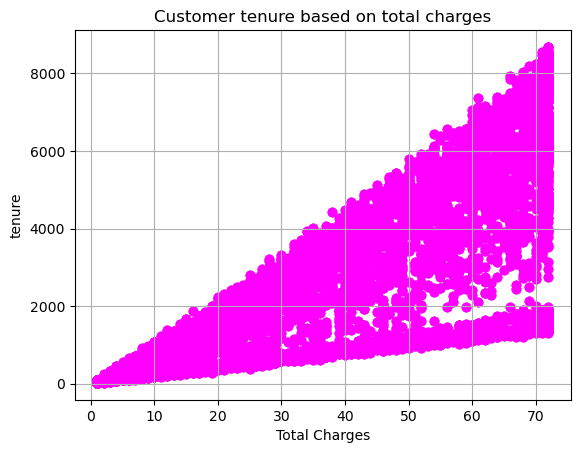

In [53]:
# always create a visual to accomodate the stats tests
# tc['total_charges'] = pd.to_numeric(tc['total_charges'])

tc_cleaned = tc.dropna(subset=['total_charges'])
tc_cleaned['total_charges'] = pd.to_numeric(tc_cleaned['total_charges'], errors='coerce')

# Drop rows with NaNs in 'total_charges' or 'tenure'
tc_cleaned = tc_cleaned.dropna(subset=['total_charges'])


plt.scatter(tc_cleaned.tenure, tc_cleaned.total_charges, color='fuchsia')
plt.xlabel('Total Charges')
plt.ylabel('tenure')
plt.title('Customer tenure based on total charges')

plt.grid()
plt.show()

In [54]:
# Checked for infinities and NaNs in 'total_charges' and 'tenure' columns
print("Infinities in 'total_charges':", np.isinf(tc_cleaned['total_charges']).any())
print("NaNs in 'total_charges':", np.isnan(tc_cleaned['total_charges']).any())

print("Infinities in 'tenure':", np.isinf(tc_cleaned['tenure']).any())
print("NaNs in 'tenure':", np.isnan(tc_cleaned['tenure']).any())


Infinities in 'total_charges': False
NaNs in 'total_charges': False
Infinities in 'tenure': False
NaNs in 'tenure': False


**-----------------------------------------------------------------------**

### - **A different way to clean the column**

In [55]:
# tc['total_charges'] = tc['total_charges'].replace('', np.nan)

tc['total_charges'] = tc['total_charges'].replace(r'^\s*$', np.nan, regex=True)
tc['total_charges'] = tc['total_charges'].astype('float')

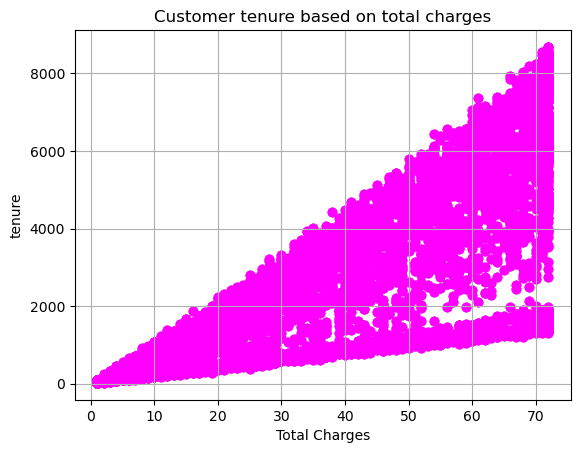

In [56]:
plt.scatter(tc.tenure, tc.total_charges, color='fuchsia')
plt.xlabel('Total Charges')
plt.ylabel('tenure')
plt.title('Customer tenure based on total charges')

plt.grid()
plt.show()

- Total charges?

In [57]:
r, p = stats.pearsonr(tc_cleaned.total_charges, tc_cleaned.tenure)
r, p

(0.8258804609332072, 0.0)

In [58]:
eval_result(p)

Awesome Sauce! Your result is significant!


- What happens if you control for phone and internet service?

In [59]:
tc.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type_id,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,No,2,Yes,2,65.6,593.3,No,3,None
1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,No,2,Yes,2,65.6,593.3,No,2,Fiber optic
2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,No,2,Yes,2,65.6,593.3,No,1,DSL
3,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,Yes,1,No,2,59.9,542.4,No,3,None
4,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,Yes,1,No,2,59.9,542.4,No,2,Fiber optic


In [60]:
# Boolean mask to control
tc = tc[(tc['phone_service'] == 'Yes') & (tc['internet_service_type'] == 'DSL')]

In [61]:
# tc['total_charges'] = tc['total_charges'].replace('', np.nan)

tc['total_charges'] = tc['total_charges'].replace(r'^\s*$', np.nan, regex=True)
tc['total_charges'] = tc['total_charges'].astype('float')

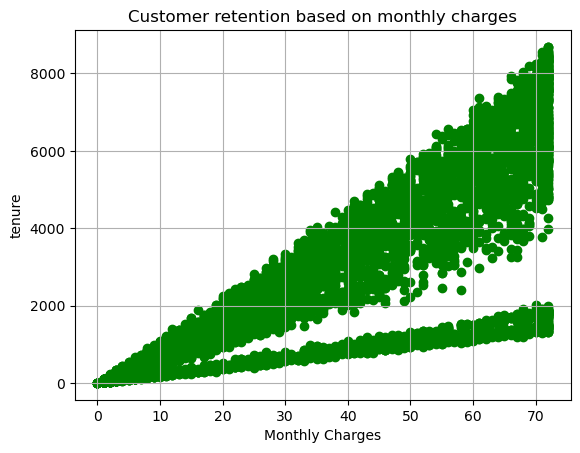

In [69]:
#always create a visual to accomodate the stats tests
plt.scatter(tc.tenure, tc.total_charges, color='green')
plt.xlabel('Monthly Charges')
plt.ylabel('tenure')
plt.title('Customer retention based on monthly charges')

plt.grid()
plt.show()

In [63]:
# Checked for infinities and NaNs in 'total_charges' and 'tenure' columns
print("Infinities in 'total_charges':", np.isinf(tc_cleaned['total_charges']).any())
print("NaNs in 'total_charges':", np.isnan(tc_cleaned['total_charges']).any())

print("Infinities in 'tenure':", np.isinf(tc_cleaned['tenure']).any())
print("NaNs in 'tenure':", np.isnan(tc_cleaned['tenure']).any())

Infinities in 'total_charges': False
NaNs in 'total_charges': False
Infinities in 'tenure': False
NaNs in 'tenure': False


In [65]:
tc.total_charges = tc.total_charges.fillna(0)

In [66]:
r, p = stats.pearsonr(tc.total_charges, tc.tenure)
r, p

(0.8301076972900466, 0.0)

## **3. Use the employees database.**

In [76]:
url = get_db_url('employees')
query = text('''
        SELECT *
        FROM employees AS e
        JOIN salaries AS s ON e.emp_no = s.emp_no
        ;
        ''')
engine = create_engine(url)
e_df = pd.read_sql(query, engine.connect())

In [77]:
e_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,66961,1990-06-25,1991-06-25


In [79]:
e_df.nunique()

emp_no        300024
birth_date      4750
first_name      1275
last_name       1637
gender             2
hire_date       5434
emp_no        300024
salary         85814
from_date       6392
to_date         6120
dtype: int64

In [80]:
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 10 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   emp_no      int64 
 1   birth_date  object
 2   first_name  object
 3   last_name   object
 4   gender      object
 5   hire_date   object
 6   emp_no      int64 
 7   salary      int64 
 8   from_date   object
 9   to_date     object
dtypes: int64(3), object(7)
memory usage: 217.0+ MB


**--------------------------------------------------------------------**

In [85]:
url = get_db_url('employees')
query = text('''
        SELECT DISTINCT *, DATEDIFF(s.to_date, s.from_date) AS days
        FROM employees AS e
        LEFT JOIN salaries AS s ON e.emp_no = s.emp_no
        WHERE s.to_date > curdate()
        ''')
engine = create_engine(url)
e_df = pd.read_sql(query, engine.connect())

In [86]:
e_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date,days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,88958,2002-06-22,9999-01-01,2920672
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,72527,2001-08-02,9999-01-01,2920996
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,43311,2001-12-01,9999-01-01,2920875
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,74057,2001-11-27,9999-01-01,2920879
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,94692,2001-09-09,9999-01-01,2920958


In [ ]:
#always create a visual to accomodate the stats tests
plt.scatter(e_df. , e_df. , color='yellow')
plt.xlabel('')
plt.ylabel('tenure')
plt.title('Customer retention based on monthly charges')

plt.grid()
plt.show()

- Is there a relationship between how long an employee has been with the company and their salary?

- Is there a relationship between how long an employee has been with the company and the number of - - titles they have had?

## **4. Use the sleepstudy data.**
   

- Is there a relationship between days and reaction time?